### We basically here handle mising values

## Basic Modules

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

## Dataset from seaborn

In [66]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [67]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Imputation of this data

<Axes: xlabel='age', ylabel='Count'>

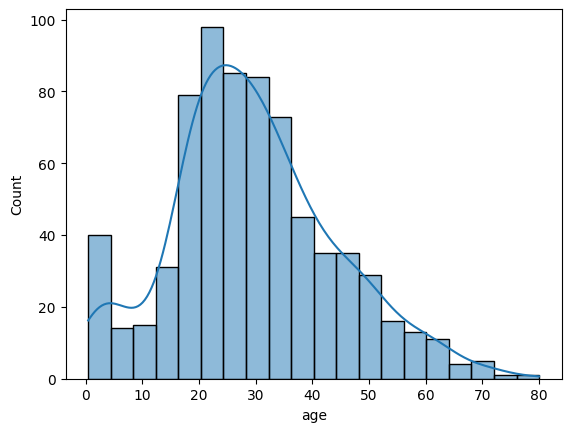

In [68]:
sns.histplot(df['age'], kde = True)

In [69]:
#df.dropna() not doing this as loss of huge data

#--------By mean--------
df['age_mean'] = df['age'].fillna(df['age'].mean()) #works well when data is normally distributed
df['age_median'] = df['age'].fillna(df['age'].median()) #when we have outliers
df['embarked_mode'] = df['embarked'].fillna(df['embarked'].mode()) #works well for categorical data type
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0,S
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0,S
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0,S
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0,S
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0,C


## Down sampling and Upsampling data

Sometimes we see that the data for a particular class is very much and for the other is less which can create biasness in data. So for that we use upsampling or downsampling methods

In [70]:
df['embarked'].value_counts()


embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### Here now we upscale the C and Q classes

In [71]:
df_minority1 = df[df['embarked'] == 'C']
df_minority2 = df[df['embarked'] == 'Q']
df_majority = df[df['embarked'] == 'S']
df_minority1.shape, df_minority2.shape, df_majority.shape

((168, 18), (77, 18), (644, 18))

In [72]:
from sklearn.utils import resample

minority1 = resample(df_minority1, replace = True, n_samples = len(df_majority), random_state=42)
minority2 = resample(df_minority2, replace=True, n_samples = len(df_majority), random_state=42)
minority1.shape, minority2.shape

((644, 18), (644, 18))

### Downscaling

In [73]:
majority1 = resample(df_majority, replace = True, n_samples = len(df_minority1), random_state=42)
majority2 = resample(df_minority2, replace = True, n_samples = len(df_minority1), random_state=42)
majority1.shape, majority2.shape

((168, 18), (168, 18))

In [74]:
df_upsampled = pd.concat([minority1, minority2, df_majority])
df_downsampled = pd.concat([majority1, majority2, df_minority1])
df_upsampled.shape, df_downsampled.shape

((1932, 18), (504, 18))

## Seeing the outliers

In [75]:
minimum, Q1, median, Q3, maximum = np.quantile(df['age_median'], [0, 0.25, 0.5, 0.75, 1])
minimum, Q1, median, Q3, maximum

(0.42, 22.0, 28.0, 35.0, 80.0)

In [76]:
IQR = Q3-Q1
IQR

13.0

We calculate the lower fence and the upper fence that is the lower and upper limit for the outliers which we can also see through boxplot

IQR-> Inter Quartile Range is the difference of Q3 and Q1

In [77]:
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR
lower_fence, upper_fence

(2.5, 54.5)

In a boxplot, the blue bar indicates the data in the range of lower and upper fence and the dots outside it are outliers

The balck line shows the things like minimum, 25%, median(50%), 75%, maximum and outliers(dots)

<Axes: ylabel='age_median'>

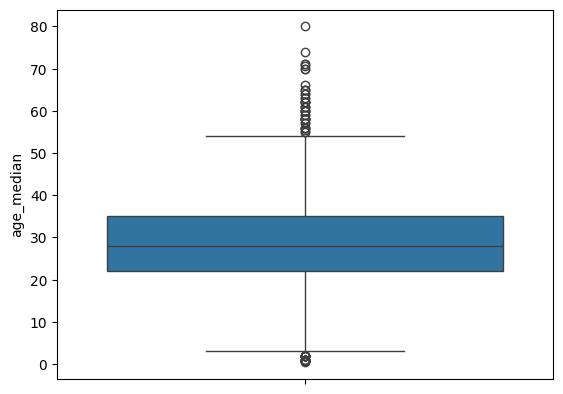

In [78]:
sns.boxplot(df['age_median'])

## One Hot Encoding or Nominal Encoding

In [79]:
df['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [80]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['embarked']]).toarray()
encoded_data

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [81]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
encoded_df

,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


In [82]:
df = pd.concat([df, encoded_df], axis = 1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,age_mean,age_median,embarked_mode,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,Southampton,no,False,22.000000,22.0,S,0.0,0.0,1.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,Cherbourg,yes,False,38.000000,38.0,C,1.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,Southampton,yes,True,26.000000,26.0,S,0.0,0.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,Southampton,yes,False,35.000000,35.0,S,0.0,0.0,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,Southampton,no,True,35.000000,35.0,S,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,Southampton,no,True,27.000000,27.0,S,0.0,0.0,1.0,0.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,Southampton,yes,True,19.000000,19.0,S,0.0,0.0,1.0,0.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,Southampton,no,False,29.699118,28.0,S,0.0,0.0,1.0,0.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,Cherbourg,yes,True,26.000000,26.0,C,1.0,0.0,0.0,0.0


## Label Encoding

Here we give each category a label not based on any ranking

In [83]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = encoder.fit_transform(df[['embarked']])
encoded

c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [84]:
encoded_df = pd.DataFrame(encoded, columns = ['embarked_lbl'])
df = pd.concat([df, encoded_df], axis = 1)
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alive,alone,age_mean,age_median,embarked_mode,embarked_C,embarked_Q,embarked_S,embarked_nan,embarked_lbl
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,no,False,22.000000,22.0,S,0.0,0.0,1.0,0.0,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,yes,False,38.000000,38.0,C,1.0,0.0,0.0,0.0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,yes,True,26.000000,26.0,S,0.0,0.0,1.0,0.0,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,yes,False,35.000000,35.0,S,0.0,0.0,1.0,0.0,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,no,True,35.000000,35.0,S,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,no,True,27.000000,27.0,S,0.0,0.0,1.0,0.0,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,yes,True,19.000000,19.0,S,0.0,0.0,1.0,0.0,2
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,no,False,29.699118,28.0,S,0.0,0.0,1.0,0.0,2
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,yes,True,26.000000,26.0,C,1.0,0.0,0.0,0.0,0


## Ordinal Encoding 

Here we do same thing as label encoding but the difference is here we give some label according to rank means 0 to small 1 to medium and 2 to large

In [85]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
encoded = encoder.fit_transform(df[['class']])
encoded_df = pd.DataFrame(encoded, columns=['class_ord'])
df = pd.concat([df, encoded_df])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alone,age_mean,age_median,embarked_mode,embarked_C,embarked_Q,embarked_S,embarked_nan,embarked_lbl,class_ord
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,...,False,22.0,22.0,S,0.0,0.0,1.0,0.0,2.0,NaN
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,...,False,38.0,38.0,C,1.0,0.0,0.0,0.0,0.0,NaN
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,...,True,26.0,26.0,S,0.0,0.0,1.0,0.0,2.0,NaN
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,...,False,35.0,35.0,S,0.0,0.0,1.0,0.0,2.0,NaN
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,...,True,35.0,35.0,S,0.0,0.0,1.0,0.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
